In [1]:
import csv
import itertools
import os
import numpy as np
import sys
import time

from code.utils import *
from code.rnnmath import *
from sys import stdout
from code.model import Model
from code.rnn import RNN
from code.gru import GRU

ModuleNotFoundError: No module named 'code.utils'; 'code' is not a package

In [15]:
import csv
import itertools
import os
import numpy as np
import sys
import time

data_folder = ""

annealValues = [0.1,0.5,1,2,4,8,16,32]

def getFileName(x):
    return f"question_5_anneal_{str(x)}_loss_acc.csv"


allAnnealData = []

for anneal in annealValues:
    fileName = getFileName(anneal)
    file = open(fileName, "r")
    csvreader = csv.reader(file)
    _ = next(csvreader)
    lossList = []
    accList = []
    for row in csvreader:
        lossList.append(float(row[1]))
        accList.append(float(row[2]))
    allAnnealData.append([anneal, lossList, accList])


In [16]:
len(allAnnealData)

8

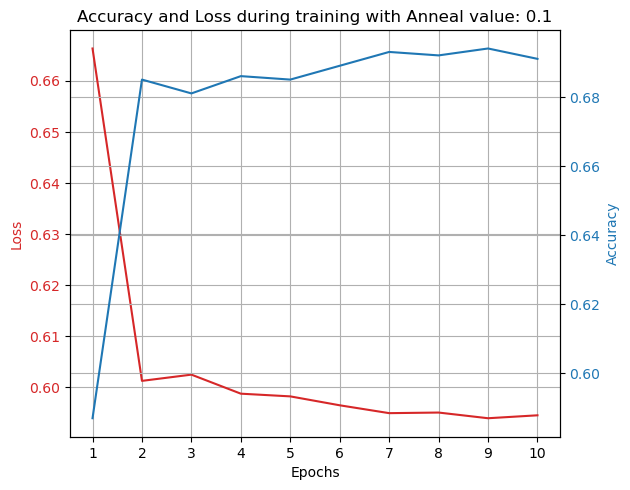

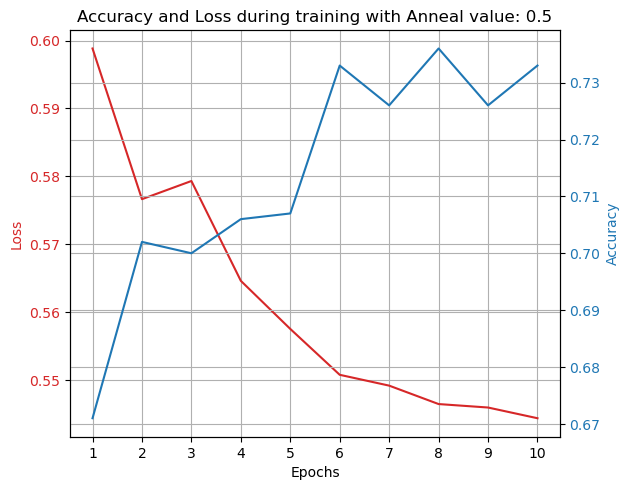

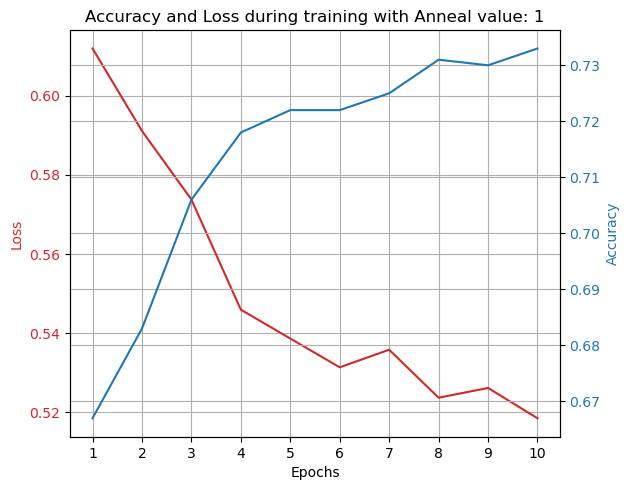

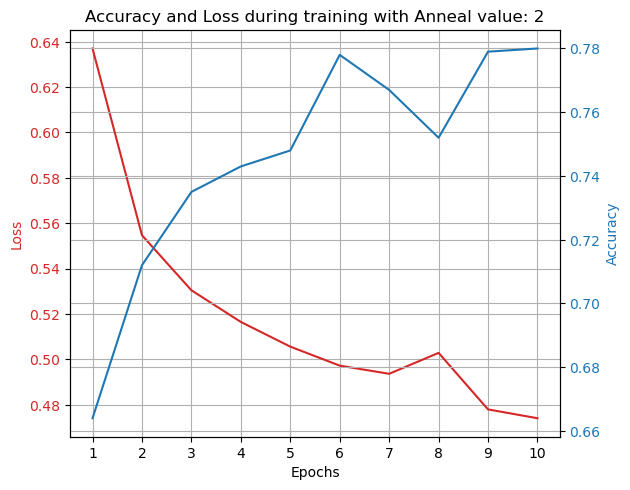

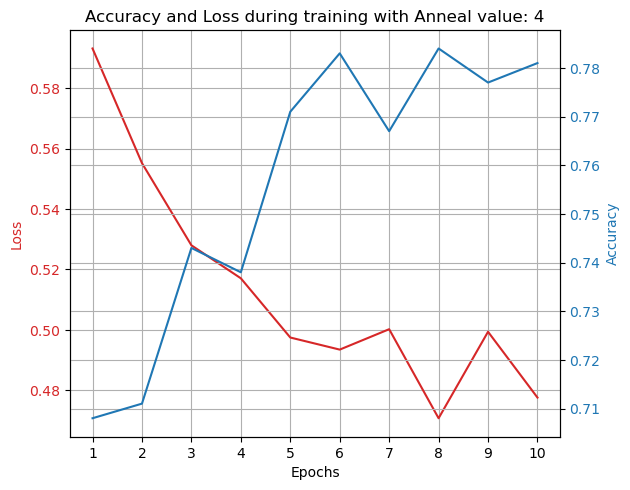

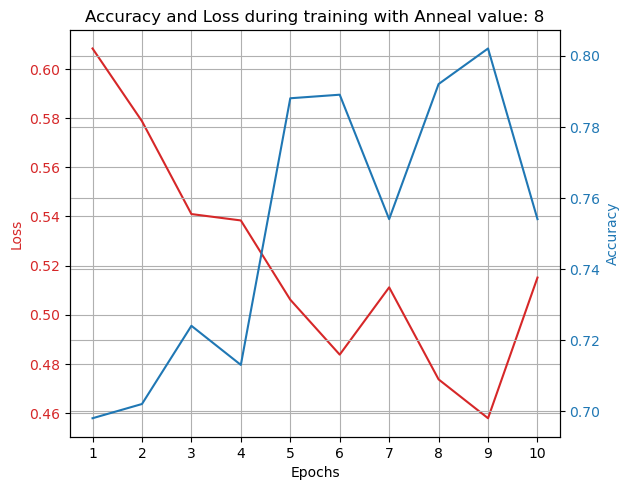

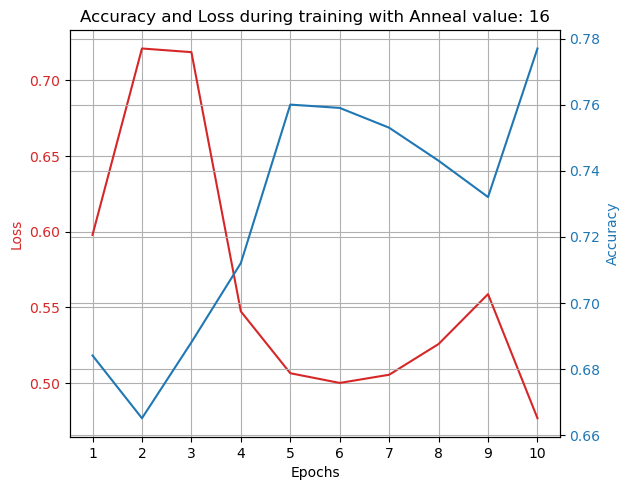

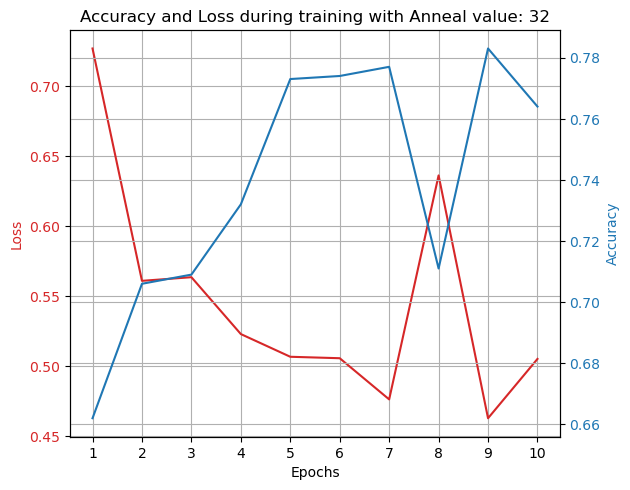

In [34]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i, (anneal, lossList, accList) in enumerate(allAnnealData):
    ax = axs[i // 2, i % 2]

    epochs = range(1, len(lossList) + 1)

    color = 'tab:red'
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss', color=color)
    ax.plot(epochs, lossList, color=color)
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid()

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax
    ax2.plot(epochs, accList, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ax.set_xticks(np.arange(min(epochs), max(epochs)+1, 1))
    ax.set_title(f"Accuracy and Loss during training with Anneal value: {anneal}")

plt.show()


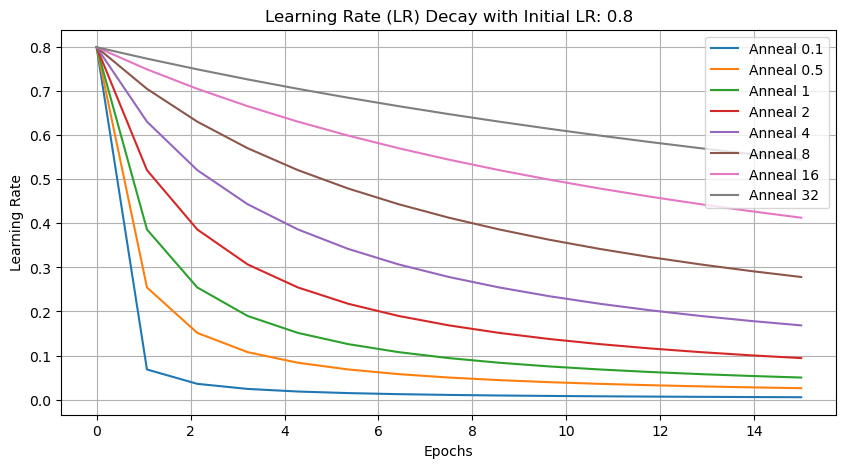

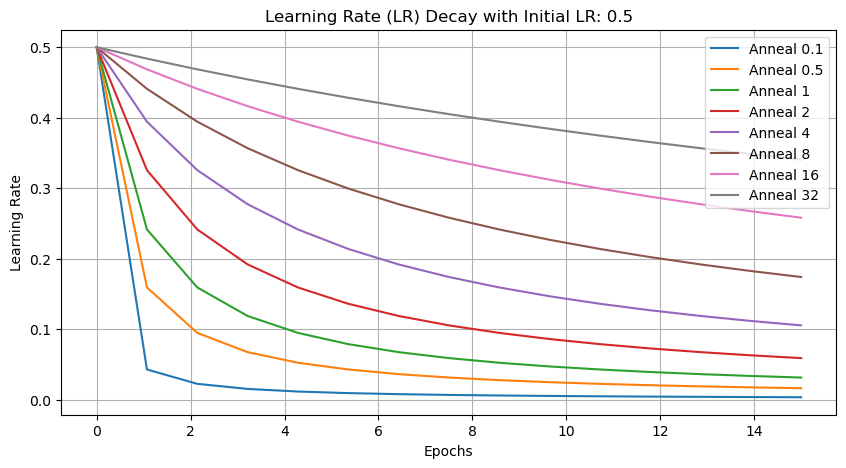

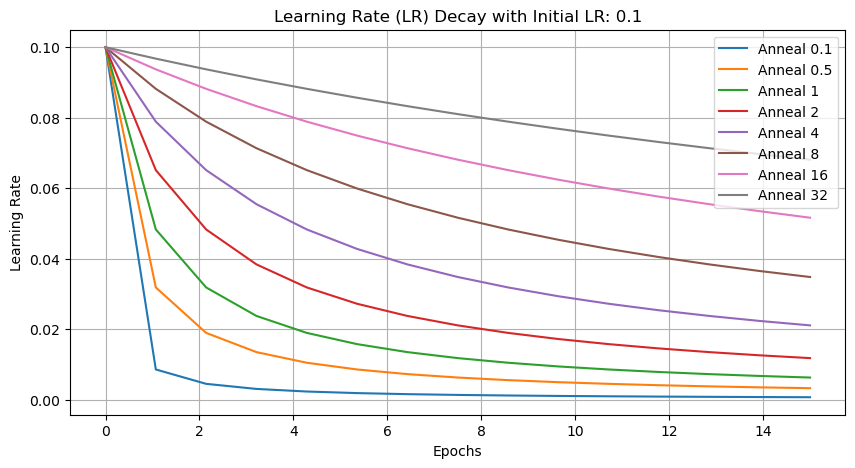

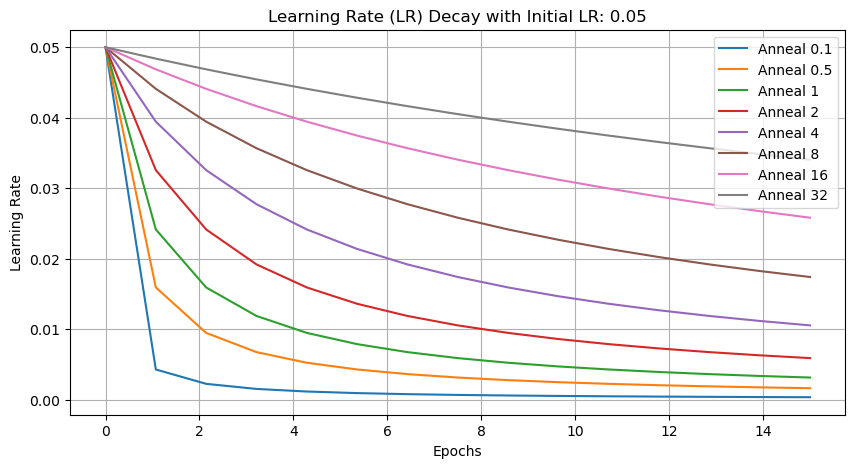

In [5]:
import matplotlib.pyplot as plt
import numpy as np

initial_learning_rate = [0.8, 0.5, 0.1, 0.05]
anneals = [0.1,0.5,1,2,4,8,16,32]

epochs = np.linspace(0, 15, 15)

for i in range(len(initial_learning_rate)):
    fig = plt.figure(figsize = (10, 5))
    for anneal_value in anneals:
        learning_rate = initial_learning_rate[i]
        learning_rate = learning_rate/ ((epochs + 0.0 + anneal_value) / anneal_value)

        # Create the plot
        plt.plot(epochs, learning_rate, label=f'Anneal {anneal_value}')

    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")
    plt.legend()
    plt.title(f'Learning Rate (LR) Decay with Initial LR: {initial_learning_rate[i]}')
    # Show the plot
    plt.grid()
    plt.show()

#learning_rate = a0 / ((epoch + 0.0 + anneal) / anneal)
